<a href="https://colab.research.google.com/github/sdaigo/playground-transformers/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers[sentencepiece] datasets --quiet

     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 342 kB 75.0 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 59.4 MB/s 
     |████████████████████████████████| 136 kB 68.3 MB/s 
     |████████████████████████████████| 212 kB 88.9 MB/s 
     |████████████████████████████████| 127 kB 77.8 MB/s 
     |████████████████████████████████| 271 kB 75.9 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 80.2 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 6.6 MB 82.6 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [2]:
from transformers import AutoTokenizer

checkpoint = "csebuetnlp/mT5_multilingual_XLSum"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/730 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:435: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


In [3]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

In [4]:
outline = """
離島・シーヘブンで保険会社に勤めるトゥルーマン・バーバンク（ジム・キャリー）は、「おはよう！ そして会えない時のために、こんにちはとこんばんは！おやすみ！」が口癖の明るい青年である。彼は生まれてから1度も島から出たことがない。それは子供の頃、父と一緒にヨットに乗って海へ出ていた時に父の警告を無視して船を進め、父を亡くしたことで水恐怖症を患ってしまったことが原因だった。
ある日、彼がいつものように新聞を買った後、雑踏の中で1人のホームレスの老人が現れる。それは海に沈み亡くなったはずの父親だった。しかしその直後、老人は瞬く間に何者かに連れ去られてしまう。トゥルーマンはそのことを母に伝えるが、見間違えだと言って取り合ってもらえない。これをきっかけにトゥルーマンは周囲の様子を不審に感じ始める。
実はトゥルーマンは生まれた時から人生の全てを24時間撮影されており、そのままリアリティ番組『トゥルーマン・ショー』として世界220ヶ国で放送され続けていた。彼の住む“世界”は巨大なドーム状のセットで、太陽や月、星々も機械仕掛けの照明装置に過ぎず、雨や雷鳴などの気象も人為的な演出である。そして何より、トゥルーマン以外の人物は全て俳優であった。加えて、この番組ではCMは入らず、番組中で商品の宣伝（プロダクトプレイスメント）が行われており、親友マーロン（ノア・エメリッヒ）や妻メリル（ローラ・リニー）も日常の中でさりげなく宣伝を行っていた。
妻との乾いた生活の一方で、トゥルーマンは学生時代に出会ったローレンという女性のことが忘れられないでいた。かつて、ローレンに惹かれたトゥルーマンが彼女をデートに誘うと、ローレンは虚構の世界に生きる彼を不憫に思って砂浜に連れ出し、ローレンとは役名で本名はシルヴィアであること、“世界”の全ては偽りであることを伝えようする。しかしそこにシルヴィアの父を名乗る男が現れ、彼女を連れていってしまう。以降、トゥルーマンは彼女と会うことはなく、「島を出るのよ！ 私を探して！」という言葉の通り、いつか島を出て彼女を探すことを夢見ていた。
そんな中で番組側のミスが重なり、周囲の異常さを確信したトゥルーマンは真実を知ろうと行動する。病院へ出勤した妻を追って手術の様子を覗き見ると、明らかに様子がおかしく素人にしか見えなった。すぐさま島から出ようとするが、不可解な理由やトラブルによりどうしても出発できない。自ら車を運転してなんとか町を出ても事故で通行止めになっていて先には進めない。一度は諦めようとするが、会ったこともない警官から「トゥルーマン」と呼ばれると、車から飛び出して通行止めを強行突破する。しかし、すぐに拘束されて家に連れ戻されてしまった。
落ち込むトゥルーマンをメリルは気遣うが、タイミング悪く不自然な宣伝をしたことでトゥルーマンに詰め寄られる。そこに訪ねてきたマーロンがトゥルーマンを連れ出し、指示された通りの台詞で彼を慰めると、実は生きていたという父と再会させる。感動の再会に世界中の視聴者は涙し、父と抱き合うトゥルーマンの姿に番組スタッフも安堵していた。
翌日、いつもと変わらぬ様子を見せるトゥルーマンだが、夜は地下室で寝るようになっていた。その違和感に気付いた番組プロデューサーのクリストフがマーロンを向かわせると地下室にトゥルーマンの姿はなく、番組の放送は一時中断される。やがて見つかったトゥルーマンはヨットに乗って島から出ていた。クリストフは嵐を発生させて引き返すように仕向けるが、トゥルーマンは諦めずヨットに体を縛り付けて抵抗する。彼の覚悟を知ったクリストフが嵐を止めさせると、やがてヨットは書割の空に激突した。
ついに“世界”の端へとたどり着き、出口の扉を開けたトゥルーマンに、放送室にいるクリストフはマイクを使って話しかける。トゥルーマンを我が子のように思っているクリストフは彼を説得するが、何も答えない彼に「何か言ってくれ！」と言う。するとトゥルーマンは突然カメラに向かって笑顔を見せ、いつもの調子で「会えない時のために、こんにちはとこんばんは！」と口癖を言い放つ。唖然とするクリストフを尻目に、トゥルーマンは扉を抜けてセットの外の世界へと踏み出し、画面から去っていく。視聴者は誰もがトゥルーマンの選択に沸き立つが、騒然とする番組スタッフは放送を中止する。
番組の終了を見届けた後、次に見る番組を探す視聴者がチャンネルを切り替えるシーンで物語は終わる。
"""

In [5]:
import re

WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

def encoder(text):
  return tokenizer(
      [WHITESPACE_HANDLER(text)],
      return_tensors="pt",
      padding="max_length",
      truncation=True,
      max_length=512,
  )

In [6]:
def generator(input_ids, max_length=84, num_beams=4):
  return model.generate(
    input_ids=input_ids,
    max_length=max_length,
    no_repeat_ngram_size=2,
    num_beams=num_beams
)

In [7]:
encoded_text = encoder(outline)
output = generator(encoded_text["input_ids"], max_length=513)

tokenizer.decode(output[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

'米国のリアリティ番組「トゥルーマン・ショー」は、世界中で放送され続けていた。しかし、番組側のミスが原因で番組内で虚構の世界が浮き彫りになっているのだ。'

In [8]:
conversation = """
[お客様]もしもしイライザ花子です。
[オペレーター] お電話ありがとうございます。イライザブライダルのイライザ次郎と申します。
[お客様] [あっ]すいません。おせわになっておます。
[オペレーター] お世話になっております。
[お客様] 昨日[あの]お電話いただいた、2022年2月2日フライトの、ハワイでの式の件なんですが。
[オペレーター] はい。
[お客様] えー。えー。すいませんお電話遅くなりまして。はい。
[オペレーター] [あ]新。はい。ええ。ありがとうございました。[あ]すいませんちょっとくればしながらこちらのイライザ花子さんの見積もり[んー]先日郵送したんですけれども。こちら問題なく到着しましたでしょうか。
[お客様] ツノリ。ちょっと待ってくださいね。[あー]2まいの、見積もり、5ひょまん円のやつですね。はい、私のところにております。
[オペレーター] はいそうです。でそちらの見積もりへの補足となりますが、
新郎新婦様の飛行機代は含まれておりますが、その他の方の飛行機代やホテル代等は含まれておりません。
[お客様] ええ。とうし話ていたときにはそれもオプションにふくまれるといていたきがするんのですが。うん。はい。
[オペレーター] この点については、こちらとしては申し訳ありませんが含まれていないということでご理解いただくしかないと存じます。ただこれまでのご検討がありますのである程度特例的に追加させていただくこともありえると思っていて今回はできないっていうところでございまして。ええ。[ま][ちょっと]こちらとしてもイライザ花子さんとお打ち合わせの上で、今後の方針方向性については、お打ち合わせしていきたいと思っているんですけれど。うん。[ま]
[お客様] ええ。
[お客様] ええ。
[お客様] はい。
[お客様] ええ。
[オペレーター] んで、[ま][そのー]イライザ花子さんとして、協議の結果できそうなポイントが、あと２人分追加することなんですかね。[ま]どの程度あるのかっていうところを、[あのー][ま]感触として伺えたらと思ってのご連絡だったんですけれど、[ま]。[あ]はい。
[お客様] [あー]そうなんですね。だからそれはちゃんと来ては先をし、[あの]お伝えしたとおりなんですね。[ま]もうこちらも、[あのー]すまやかにかいけつできればと思ってるので、そんな[あのー][う]拝見。[ん]何でもかんでも交渉っていうつもりはもういいです全くないんで、わたもそうですねそうだんでなっとくです。えーそうです。
[オペレーター] ええ、分かりました。
[お客様] はいはい。そうでございます。ちょっとそういうふうに、追加して、何とかお願いしたいです。
[オペレーター][えーと]ではちょと打ったさんのほうだった。はい。[あの]方針については検討した上で改めて、ご連絡いたします。
[お客様] だからたのかなっとね。はい、はいすいません。よろしくお願いします。はい。
[オペレーター] はい。失礼いたします。
[お客様] 失礼します。
"""

In [9]:
encoded_text = encoder(conversation)
output = generator(encoded_text["input_ids"], max_length=120, num_beams=8)

tokenizer.decode(output[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

'イライザ花子(仮名)がハワイで結婚式をキャンセルした問題で、客室乗務員を問う電話のやりとりが続いている。電話での応酬を交わした匿名の信件が、以下に説明する。'

# NER (Named Entity Recognition)

In [10]:
from transformers import pipeline

ner_tagger = pipeline("ner", aggregation_strategy="simple")

text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

outputs = ner_tagger(text)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

In [11]:
import pandas as pd

pd.DataFrame(outputs)

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


# Text Classification

In [12]:
from datasets import list_datasets

all_datasets = list_datasets()

print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are:  {all_datasets[:10]}")

There are 4801 datasets currently available on the Hub
The first 10 are:  ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [13]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [15]:
train_dataset = emotions["train"]

train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [16]:
len(train_dataset)

16000

In [17]:
train_dataset[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [18]:
train_dataset.column_names

['text', 'label']

In [19]:
train_dataset.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'text': Value(dtype='string', id=None)}

In [20]:
train_dataset[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [21]:
train_dataset["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [22]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)

df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [24]:
emotions["train"].features["label"]

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

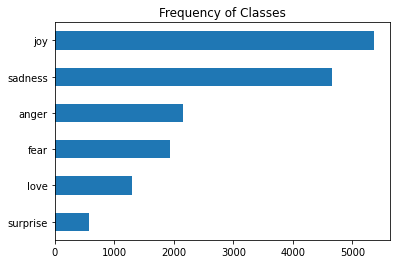

In [25]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


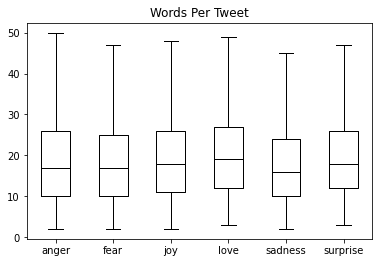

In [26]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")

plt.suptitle("")
plt.xlabel("")
plt.show()

In [27]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [28]:
emotions.reset_format()

In [29]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [30]:
encoded_text = tokenizer(text)

encoded_text

{'input_ids': [101, 6203, 9733, 1010, 2197, 2733, 1045, 3641, 2019, 23569, 19315, 3539, 2895, 3275, 2013, 2115, 3784, 3573, 1999, 2762, 1012, 6854, 1010, 2043, 1045, 2441, 1996, 7427, 1010, 1045, 3603, 2000, 2026, 5469, 2008, 1045, 2018, 2042, 2741, 2019, 2895, 3275, 1997, 13164, 15312, 2612, 999, 2004, 1037, 13506, 4099, 1997, 1996, 11703, 23606, 28524, 2015, 1010, 1045, 3246, 2017, 2064, 3305, 2026, 21883, 1012, 2000, 10663, 1996, 3277, 1010, 1045, 5157, 2019, 3863, 1997, 13164, 15312, 2005, 1996, 23569, 19315, 3539, 3275, 1045, 3641, 1012, 10837, 2024, 4809, 1997, 2026, 2636, 7175, 2023, 5309, 1012, 1045, 5987, 2000, 2963, 2013, 2017, 2574, 1012, 25664, 1010, 26352, 3468, 11306, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [32]:
tokens

['[CLS]',
 'dear',
 'amazon',
 ',',
 'last',
 'week',
 'i',
 'ordered',
 'an',
 'opt',
 '##imus',
 'prime',
 'action',
 'figure',
 'from',
 'your',
 'online',
 'store',
 'in',
 'germany',
 '.',
 'unfortunately',
 ',',
 'when',
 'i',
 'opened',
 'the',
 'package',
 ',',
 'i',
 'discovered',
 'to',
 'my',
 'horror',
 'that',
 'i',
 'had',
 'been',
 'sent',
 'an',
 'action',
 'figure',
 'of',
 'mega',
 '##tron',
 'instead',
 '!',
 'as',
 'a',
 'lifelong',
 'enemy',
 'of',
 'the',
 'dec',
 '##ept',
 '##icon',
 '##s',
 ',',
 'i',
 'hope',
 'you',
 'can',
 'understand',
 'my',
 'dilemma',
 '.',
 'to',
 'resolve',
 'the',
 'issue',
 ',',
 'i',
 'demand',
 'an',
 'exchange',
 'of',
 'mega',
 '##tron',
 'for',
 'the',
 'opt',
 '##imus',
 'prime',
 'figure',
 'i',
 'ordered',
 '.',
 'enclosed',
 'are',
 'copies',
 'of',
 'my',
 'records',
 'concerning',
 'this',
 'purchase',
 '.',
 'i',
 'expect',
 'to',
 'hear',
 'from',
 'you',
 'soon',
 '.',
 'sincerely',
 ',',
 'bum',
 '##ble',
 '##bee',
 '.

In [33]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] dear amazon, last week i ordered an optimus prime action figure from your online store in germany. unfortunately, when i opened the package, i discovered to my horror that i had been sent an action figure of megatron instead! as a lifelong enemy of the decepticons, i hope you can understand my dilemma. to resolve the issue, i demand an exchange of megatron for the optimus prime figure i ordered. enclosed are copies of my records concerning this purchase. i expect to hear from you soon. sincerely, bumblebee. [SEP]'

In [34]:
tokenizer.vocab_size

30522

In [35]:
tokenizer.model_max_length

512

In [36]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [37]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [38]:
print(tokenize(train_dataset[:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [39]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [40]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']